# Indonesia Archipelago scenario analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from tqdm import tqdm_notebook

from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature

from scipy import stats
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
# read in the files
path = '/Users/yuempark/Downloads/modern_scenario_outputs/'

ctrl_nc = Dataset(path+'DynSoil_Climate_CTRL_286ppm.nc')
redIA_nc = Dataset(path+'DynSoil_Climate_redIA.nc')
noIA_nc = Dataset(path+'DynSoil_Climate_noIA.nc')

test_params = pd.read_csv('../Output/test_params.csv')

In [3]:
ctrl_nc.variables.keys()

odict_keys(['lon', 'lat', 'lith', 'runs', 'area', 'atm_CO2_level', 'volcanic_degassing', 'erosion', 'reg_thickness', 'volumetric_weathering', 'weathering', 'x_p_surf'])

In [4]:
test_params.columns

Index(['ke', 'a', 'b', 'krp', 'Ea_rp', 'T0_rp', 'h0', 'kd', 'kw', 'Ea', 'T0',
       'sigma', 'CaMg_1', 'CaMg_2', 'CaMg_3', 'CaMg_4', 'CaMg_5', 'CaMg_6',
       'R2'],
      dtype='object')

In [5]:
compiled_df = test_params.copy()
compiled_df['volcanic_degassing'] = redIA_nc.variables['volcanic_degassing'][:].data
compiled_df['redIA_ppm'] = redIA_nc.variables['atm_CO2_level'][:].data
compiled_df['noIA_ppm'] = noIA_nc.variables['atm_CO2_level'][:].data

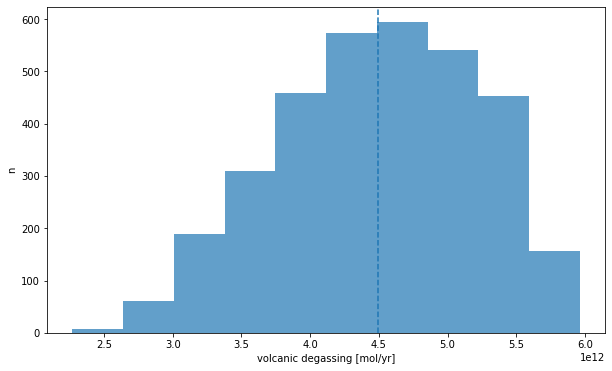

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(compiled_df['volcanic_degassing'], color='C0', alpha=0.7)
ax.axvline(np.mean(compiled_df['volcanic_degassing']), c='C0', ls='--')

ax.set_xlabel('volcanic degassing [mol/yr]')
ax.set_ylabel('n')

plt.show(fig)

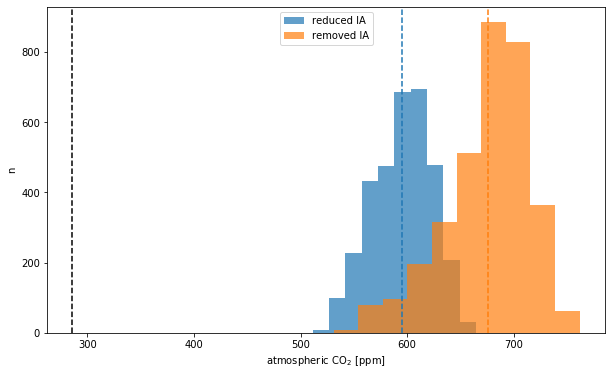

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(compiled_df['redIA_ppm'], color='C0', alpha=0.7, label='reduced IA')
ax.axvline(np.mean(compiled_df['redIA_ppm']), c='C0', ls='--')

ax.hist(compiled_df['noIA_ppm'], color='C1', alpha=0.7, label='removed IA')
ax.axvline(np.mean(compiled_df['noIA_ppm']), c='C1', ls='--')

ax.axvline(286, c='k', ls='--')

ax.set_xlabel('atmospheric CO$_{2}$ [ppm]')
ax.set_ylabel('n')
ax.legend()

plt.show(fig)

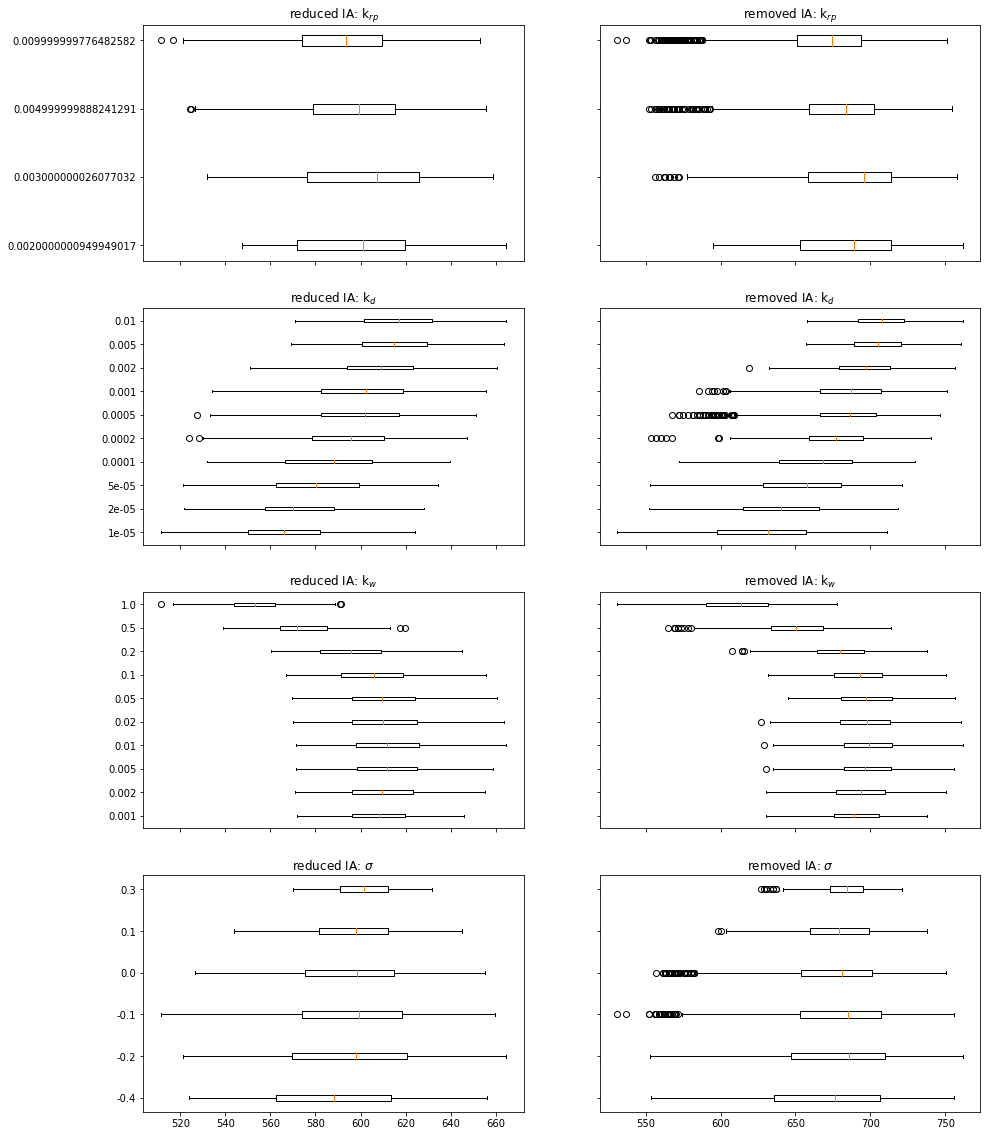

In [8]:
fig, ax = plt.subplots(nrows=4, ncols=2, sharex='col', sharey='row', figsize=(15,20))

ax = ax.flatten()

# krp

unique_vals = compiled_df['krp'].unique()
unique_vals = np.sort(unique_vals)
for i in range(len(unique_vals)):
    ax[0].boxplot(x=compiled_df[compiled_df['krp']==unique_vals[i]]['redIA_ppm'],
                  positions=np.arange(i,i+1),
                  vert=False, manage_ticks=False)
ax[0].set_title('reduced IA: k$_{rp}$')
ax[0].set_yticks(np.arange(len(unique_vals)))
ax[0].set_yticklabels(unique_vals)

for i in range(len(unique_vals)):
    ax[1].boxplot(x=compiled_df[compiled_df['krp']==unique_vals[i]]['noIA_ppm'],
                  positions=np.arange(i,i+1),
                  vert=False, manage_ticks=False)
ax[1].set_title('removed IA: k$_{rp}$')

# kd

unique_vals = compiled_df['kd'].unique()
unique_vals = np.sort(unique_vals)
for i in range(len(unique_vals)):
    ax[2].boxplot(x=compiled_df[compiled_df['kd']==unique_vals[i]]['redIA_ppm'],
                  positions=np.arange(i,i+1),
                  vert=False, manage_ticks=False)
ax[2].set_title('reduced IA: k$_{d}$')
ax[2].set_yticks(np.arange(len(unique_vals)))
ax[2].set_yticklabels(unique_vals)

for i in range(len(unique_vals)):
    ax[3].boxplot(x=compiled_df[compiled_df['kd']==unique_vals[i]]['noIA_ppm'],
                  positions=np.arange(i,i+1),
                  vert=False, manage_ticks=False)
ax[3].set_title('removed IA: k$_{d}$')

# kw

unique_vals = compiled_df['kw'].unique()
unique_vals = np.sort(unique_vals)
for i in range(len(unique_vals)):
    ax[4].boxplot(x=compiled_df[compiled_df['kw']==unique_vals[i]]['redIA_ppm'],
                  positions=np.arange(i,i+1),
                  vert=False, manage_ticks=False)
ax[4].set_title('reduced IA: k$_{w}$')
ax[4].set_yticks(np.arange(len(unique_vals)))
ax[4].set_yticklabels(unique_vals)

for i in range(len(unique_vals)):
    ax[5].boxplot(x=compiled_df[compiled_df['kw']==unique_vals[i]]['noIA_ppm'],
                  positions=np.arange(i,i+1),
                  vert=False, manage_ticks=False)
ax[5].set_title('removed IA: k$_{w}$')

# sigma

unique_vals = compiled_df['sigma'].unique()
unique_vals = np.sort(unique_vals)
for i in range(len(unique_vals)):
    ax[6].boxplot(x=compiled_df[compiled_df['sigma']==unique_vals[i]]['redIA_ppm'],
                  positions=np.arange(i,i+1),
                  vert=False, manage_ticks=False)
ax[6].set_title('reduced IA: $\\sigma$')
ax[6].set_yticks(np.arange(len(unique_vals)))
ax[6].set_yticklabels(unique_vals)

for i in range(len(unique_vals)):
    ax[7].boxplot(x=compiled_df[compiled_df['sigma']==unique_vals[i]]['noIA_ppm'],
                  positions=np.arange(i,i+1),
                  vert=False, manage_ticks=False)
ax[7].set_title('removed IA: $\\sigma$')

plt.show(fig)

In [9]:
# get a dataframe with just the changing parameters
stat_cols = ['krp','kd','kw','sigma','CaMg_1','CaMg_6','redIA_ppm','noIA_ppm','R2','volcanic_degassing']
stat_df = compiled_df[stat_cols].copy()

# standardize
scaler = StandardScaler()
stat_df = scaler.fit_transform(stat_df)
stat_df = pd.DataFrame(data=stat_df, columns=stat_cols)

# PCA
pca = PCA()
PCA_Y = pca.fit_transform(stat_df)

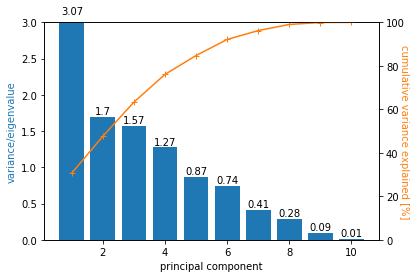

In [10]:
fig, ax = plt.subplots()

rects = ax.bar(np.arange(len(pca.explained_variance_))+1, pca.explained_variance_, color='C0')
ax.set_ylabel('variance/eigenvalue', color='C0')
ax.set_xlabel('principal component')
ax.set_ylim(0,3)

twinax = ax.twinx()
twinax.plot(np.arange(len(pca.explained_variance_ratio_))+1,
            np.cumsum(pca.explained_variance_ratio_)*100, '-+', color='C1')
twinax.set_ylim(0,100)
twinax.set_ylabel('cumulative variance explained [%]', rotation=270, color='C1')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if height>=0:
            ax.text(rect.get_x() + rect.get_width()/2, height+0.08,
                    np.round(height,2),
                    ha='center', va='center')
        else:
            ax.text(rect.get_x() + rect.get_width()/2, height-0.08,
                    np.round(height,2),
                    ha='center', va='center')
            
autolabel(rects)

plt.show(fig)

In [11]:
N = len(stat_cols)
for i in range(N):
    print('PC' + str(i+1) + ': ' + str(np.round(pca.explained_variance_ratio_[i]*100,1)) + '%')

PC1: 30.7%
PC2: 17.0%
PC3: 15.7%
PC4: 12.7%
PC5: 8.7%
PC6: 7.4%
PC7: 4.1%
PC8: 2.8%
PC9: 0.9%
PC10: 0.1%


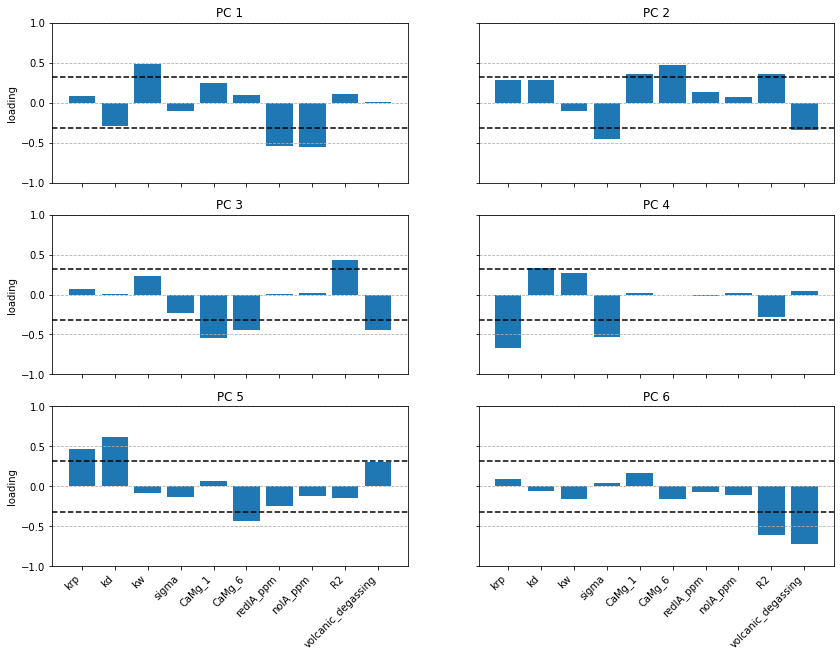

In [12]:
ind = np.arange(N)

component_names = []
for i in range(len(stat_cols)):
    component_names.append('PC ' + str(i+1))

eigenvectors = pd.DataFrame(pca.components_.T, columns=component_names, index=stat_cols)

cutoff = np.sqrt(1/len(stat_cols))

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(14,10), sharey=True, sharex=True)

ax = ax.flatten()

for i in range(6):
    ax[i].bar(ind, eigenvectors['PC ' + str(i+1)], color='C0')
    ax[i].set_ylim(-1,1)
    ax[i].yaxis.grid(ls='--')
    ax[i].axhline(cutoff, ls='--', c='k')
    ax[i].axhline(-cutoff, ls='--', c='k')
    ax[i].set_title('PC ' + str(i+1))
    ax[i].set_xticklabels([])
    
ax[4].set_xticks(ind)
ax[4].set_xticklabels(stat_cols, rotation=45, ha='right')
ax[5].set_xticks(ind)
ax[5].set_xticklabels(stat_cols, rotation=45, ha='right')

ax[0].set_ylabel('loading')
ax[2].set_ylabel('loading')
ax[4].set_ylabel('loading')

plt.show(fig)

In [13]:
sns_df_1 = pd.DataFrame({'ppm':redIA_nc.variables['atm_CO2_level'][:].data,
                         'scenario':['redIA']*len(redIA_nc.variables['atm_CO2_level'][:].data)})

sns_df_2 = pd.DataFrame({'ppm':noIA_nc.variables['atm_CO2_level'][:].data,
                         'scenario':['noIA']*len(noIA_nc.variables['atm_CO2_level'][:].data)})

sns_df = pd.concat([sns_df_1,sns_df_2], ignore_index=True)

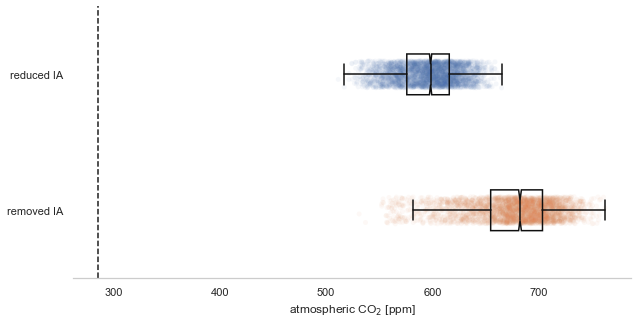

In [14]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,5))

sns.stripplot(x='ppm', y='scenario', data=sns_df, dodge=True, jitter=True, alpha=0.05, zorder=-99)

sns.boxplot(x='ppm', y='scenario', data=sns_df, color='k', fliersize=0, width=0.3, notch=True, zorder=99)

for patch in ax.artists:
    r,g,b,a = patch.get_facecolor()
    patch.set_facecolor((0,0,0,0))
    
ax.axvline(286, c='k', ls='--')

ax.set_yticklabels(['reduced IA','removed IA'])
ax.set_ylabel('')
ax.set_xlabel('atmospheric CO$_{2}$ [ppm]')

ax.xaxis.grid(False)
sns.despine(left=True)

plt.show(fig)